# Análisis Conjunto. 
## Unión de los tres datasets trabajados, análisis estadístico y de correlaciones, selección de características para los datos de Madrid ciudad 2018 y 2019
1. Carga de fuentes de datos
2. Comprensión de los datos mediante:
    1. Estadística descriptiva
    2. Visualización.
3. Preparación del modelo.
    1. Pre-procesar los datos para describir mejor la estructura del problema.
    2. Selección de características.

In [1]:
#Importamos las librerías que vamos a usar para los distintos pasos del problema

import numpy as np
import pandas as pd
from numpy import set_printoptions
#Visualización
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#Preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
#Remuestreo
from sklearn.model_selection import train_test_split;
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#Algoritmos de Regresión Lineal
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
#Algoritmos de Regresión No Lineal
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#Métricas de evaluación de algoritmos
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Ensamblamiento Clasificación 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
#Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


## 1. Carga de fuentes de datos
### Carga del dataset trabajado de calidad del aire en Madrid

In [2]:
#cargamos datos de contaminacion de madrid  
dfContaminacion= pd.read_csv('../../Contaminacion/datosContaminacionMadrid/JupiterNoteBook/contaminacionMadrid2018_2019.csv' , sep=';', delimiter=None, header='infer', names=None, index_col=None,)


In [3]:
dfContaminacion['date'] = pd.to_datetime(dfContaminacion['date'], format='%Y-%m-%d')
dfContaminacion=dfContaminacion.set_index('date')
dfContaminacion.index.rename('fecha', inplace=True)
dfContaminacion.head

<bound method NDFrame.head of             pm10  pm25    o3   no2  so2
fecha                                  
2018-01-01   8.0  21.0  27.0  15.0  2.5
2018-01-02   8.5  20.0  15.5  18.0  8.5
2018-01-03   8.0  30.5  14.5  16.0  4.0
2018-01-04   5.0  27.0  17.5  16.5  1.0
2018-01-05   3.0  16.5  28.0  14.5  1.0
...          ...   ...   ...   ...  ...
2019-12-26  13.5  57.0  10.0  28.0  8.0
2019-12-27  24.0  35.5   5.0  33.5  8.5
2019-12-28  18.5  64.0   9.0  31.5  4.5
2019-12-29  16.5  55.0  30.0  17.0  3.0
2019-12-31  35.5  40.5   5.0  28.5  4.0

[729 rows x 5 columns]>

In [4]:
#de momento sacamos 2018 y 2019
dfContaminacion_18_19 = dfContaminacion['2018':'2019']
dfContaminacion_18_19.head

<bound method NDFrame.head of             pm10  pm25    o3   no2  so2
fecha                                  
2018-01-01   8.0  21.0  27.0  15.0  2.5
2018-01-02   8.5  20.0  15.5  18.0  8.5
2018-01-03   8.0  30.5  14.5  16.0  4.0
2018-01-04   5.0  27.0  17.5  16.5  1.0
2018-01-05   3.0  16.5  28.0  14.5  1.0
...          ...   ...   ...   ...  ...
2019-12-26  13.5  57.0  10.0  28.0  8.0
2019-12-27  24.0  35.5   5.0  33.5  8.5
2019-12-28  18.5  64.0   9.0  31.5  4.5
2019-12-29  16.5  55.0  30.0  17.0  3.0
2019-12-31  35.5  40.5   5.0  28.5  4.0

[729 rows x 5 columns]>

### Carga del dataset trabajado de meterología en Madrid

In [5]:
#cargamos dataframe meteo madrid y ponemos campo fecha como indice
df_estacion_datos_diarios = pd.read_csv('../../Meteorologia/df_sinhoras_estacion_datos_diarios_mad.csv')
df_estacion_datos_diarios['fecha'] = pd.to_datetime(df_estacion_datos_diarios['fecha'], format='%Y-%m-%d')
df_estacion_datos_diarios=df_estacion_datos_diarios.set_index('fecha')

#df_estacion_datos_diarios['fecha']=pd.to_datetime(df_estacion_datos_diarios["fecha"], format='%Y-%m-%d', errors='coerce')
#df_estacion_datos_diarios['fecha'] = pd.DatetimeIndex(df_estacion_datos_diarios['fecha']).date

In [6]:
print(df_estacion_datos_diarios.columns)
df_estacion_datos_diarios.head

Index(['indicativo', 'nombre', 'provincia', 'altitud', 'tmed', 'prec', 'tmin',
       'tmax', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin',
       'month', 'week', 'year', 'season', 'season_name'],
      dtype='object')


<bound method NDFrame.head of            indicativo                        nombre provincia  altitud  tmed  \
fecha                                                                          
2018-01-01       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   6.2   
2018-01-02       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   9.4   
2018-01-03       3196        MADRID, CUATRO VIENTOS    MADRID    690.0  10.9   
2018-01-04       3196        MADRID, CUATRO VIENTOS    MADRID    690.0  11.3   
2018-01-05       3196        MADRID, CUATRO VIENTOS    MADRID    690.0   8.2   
...               ...                           ...       ...      ...   ...   
2019-12-27      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   7.6   
2019-12-28      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   7.2   
2019-12-29      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   6.9   
2019-12-30      3194U  MADRID, CIUDAD UNIVERSITARIA    MADRID    664.0   5.7   
2019-12-31

In [7]:
#queremos 1 medina para la ciudad de madrid. hacemos drop las columnas que identifican el nombre de la estacion o relativas a la fecha. Nos quedamos solo con los valores
df_Meteo_Mad=df_estacion_datos_diarios.drop(columns=['altitud','provincia','indicativo','nombre', 'month', 'week' ,'year' ,'season','season_name'])
print(df_Meteo_Mad)

            tmed  prec  tmin  tmax   dir  velmedia  racha  sol  presmax  \
fecha                                                                     
2018-01-01   6.2   0.0   1.5  11.0  26.0      5.30  11.90  5.9   952.20   
2018-01-02   9.4   0.0   5.5  13.2  29.0      4.20  11.90  7.0   952.20   
2018-01-03  10.9   0.0   7.2  14.6  26.0      5.30  10.30  4.6   952.90   
2018-01-04  11.3   0.0   8.3  14.3  25.0      4.70  10.30  5.8   949.80   
2018-01-05   8.2  13.6   5.1  11.4  22.0      5.30  12.50  1.6   941.00   
...          ...   ...   ...   ...   ...       ...    ...  ...      ...   
2019-12-27   7.6   0.0  -0.4  15.6   5.0      0.80   6.10  8.4   951.45   
2019-12-28   7.2   0.0  -2.3  16.8  21.0      0.60   4.15  9.0   950.75   
2019-12-29   6.9   0.0  -1.9  15.7  67.0      0.80   3.75  9.0   952.25   
2019-12-30   5.7   0.0  -2.0  13.4  14.0      0.70   4.20  8.9   952.95   
2019-12-31   6.0   0.0  -1.5  13.4  21.0      0.55   3.10  8.7   953.10   

            presmin  
fe

In [8]:
df_Meteo_Mad= df_Meteo_Mad.resample('D').median()
df_Meteo_Mad.head

<bound method NDFrame.head of             tmed  prec  tmin  tmax   dir  velmedia  racha  sol  presmax  \
fecha                                                                     
2018-01-01   6.9   0.0   1.7  11.6  26.0      3.10  10.00  5.9   953.25   
2018-01-02  10.4   0.0   6.3  13.4  29.0      2.80  11.90  7.0   953.25   
2018-01-03  10.9   0.0   7.2  14.6  23.0      1.70   8.60  4.6   954.15   
2018-01-04  11.3   0.0   7.9  14.3  25.0      2.20   7.80  5.8   951.55   
2018-01-05   8.2  13.6   5.2  11.4  22.0      3.10  11.70  1.6   942.35   
...          ...   ...   ...   ...   ...       ...    ...  ...      ...   
2019-12-27   8.9   0.0   2.5  15.6   5.0      0.80   6.10  8.4   951.45   
2019-12-28   8.2   0.0   2.0  16.5  21.0      0.60   4.15  9.0   950.75   
2019-12-29   7.8   0.0   2.0  15.2  67.0      0.80   3.75  9.0   952.25   
2019-12-30   7.0   0.0   1.5  13.2  14.0      0.70   4.20  8.9   952.95   
2019-12-31   6.8   0.0   1.5  13.1  21.0      0.55   3.10  8.7   953.1

### Carga del dataset trabajado de tráfico en Madrid

In [9]:
#cargamos datos de trafico de madrid 
dftrafico= pd.read_csv('../../Tráfico/Madrid/trafico_mad.csv' , sep=',', delimiter=None, header='infer', names=None, index_col=None,)
dftrafico['fecha'] = pd.to_datetime(dftrafico['fecha'], format='%Y-%m-%d')
dftrafico.head

<bound method NDFrame.head of           fecha  intensidad  ocupacion  carga
0    2018-01-01       131.0        1.0    9.5
1    2018-01-02       256.5        3.0   20.0
2    2018-01-03       272.5        4.0   21.5
3    2018-01-04       284.0        4.0   22.0
4    2018-01-05       272.0        4.0   21.0
...         ...         ...        ...    ...
1091 2020-12-27       121.0        1.0    8.5
1092 2020-12-28       217.5        3.0   16.0
1093 2020-12-29       226.0        3.0   16.5
1094 2020-12-30       232.0        3.0   17.0
1095 2020-12-31       158.5        2.0   11.0

[1096 rows x 4 columns]>

In [10]:
dftrafico.dtypes

fecha         datetime64[ns]
intensidad           float64
ocupacion            float64
carga                float64
dtype: object

In [11]:
#tenemos datos de 2018,2019 y 2020 en el csv.
#tenemos que quedarnos solo con las filas de 2018 y 2019
dftrafico['year'] = pd.DatetimeIndex(dftrafico['fecha']).year
años=['2020']
# ~dftrafico['year'].isin(años) para "not in" // dftrafico['year'].isin(años) para "isin"
dftrafico_18_19 =dftrafico[~dftrafico['year'].isin(años)]
dftrafico_18_19.shape

(730, 5)

In [12]:
dftrafico_18_19=dftrafico_18_19.set_index('fecha')
dftrafico_18_19.index.rename('fecha', inplace=True)
dftrafico_18_19=dftrafico_18_19[['intensidad','ocupacion','carga']]
dftrafico_18_19.head

<bound method NDFrame.head of             intensidad  ocupacion  carga
fecha                                   
2018-01-01      131.00        1.0    9.5
2018-01-02      256.50        3.0   20.0
2018-01-03      272.50        4.0   21.5
2018-01-04      284.00        4.0   22.0
2018-01-05      272.00        4.0   21.0
...                ...        ...    ...
2019-12-27      252.00        3.0   19.0
2019-12-28      168.00        2.0   12.5
2019-12-29      145.25        2.0   10.5
2019-12-30      245.50        3.0   18.5
2019-12-31      174.00        2.0   13.0

[730 rows x 3 columns]>

### Unión de los tres datasets para tener datos de Calidad, Meteo y Tráfico en Barcelona conjuntamente

In [13]:
dfMergeado = pd.merge(dfContaminacion_18_19, df_Meteo_Mad, left_index=True, right_index=True)
dfMergeado = pd.merge(dfMergeado, dftrafico_18_19, left_index=True, right_index=True)
print(dfMergeado)

            pm10  pm25    o3   no2  so2  tmed  prec  tmin  tmax   dir  \
fecha                                                                   
2018-01-01   8.0  21.0  27.0  15.0  2.5   6.9   0.0   1.7  11.6  26.0   
2018-01-02   8.5  20.0  15.5  18.0  8.5  10.4   0.0   6.3  13.4  29.0   
2018-01-03   8.0  30.5  14.5  16.0  4.0  10.9   0.0   7.2  14.6  23.0   
2018-01-04   5.0  27.0  17.5  16.5  1.0  11.3   0.0   7.9  14.3  25.0   
2018-01-05   3.0  16.5  28.0  14.5  1.0   8.2  13.6   5.2  11.4  22.0   
...          ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   
2019-12-26  13.5  57.0  10.0  28.0  8.0  10.3   0.0   5.0  15.8   2.5   
2019-12-27  24.0  35.5   5.0  33.5  8.5   8.9   0.0   2.5  15.6   5.0   
2019-12-28  18.5  64.0   9.0  31.5  4.5   8.2   0.0   2.0  16.5  21.0   
2019-12-29  16.5  55.0  30.0  17.0  3.0   7.8   0.0   2.0  15.2  67.0   
2019-12-31  35.5  40.5   5.0  28.5  4.0   6.8   0.0   1.5  13.1  21.0   

            velmedia  racha  sol  presmax  presmin

## 2. Comprensión de los datos mediante:
    1. Estadística descriptiva
    2. Visualización.

Primero eliminamos columnas innecesarias ('pm25','o3','so2' de contaminacion y 'ocupacion', 'carga' de trafico ).
Nos enfocamos en los AQI de los contaminantes pm10 y no2 , asi como una medida de trafico como hacemos en el trabajo para la ciudad de Barcelona

In [14]:
dfMergeado = dfMergeado.drop(columns=['pm25','o3','so2','ocupacion', 'carga'])
print(dfMergeado)

            pm10   no2  tmed  prec  tmin  tmax   dir  velmedia  racha  sol  \
fecha                                                                        
2018-01-01   8.0  15.0   6.9   0.0   1.7  11.6  26.0      3.10  10.00  5.9   
2018-01-02   8.5  18.0  10.4   0.0   6.3  13.4  29.0      2.80  11.90  7.0   
2018-01-03   8.0  16.0  10.9   0.0   7.2  14.6  23.0      1.70   8.60  4.6   
2018-01-04   5.0  16.5  11.3   0.0   7.9  14.3  25.0      2.20   7.80  5.8   
2018-01-05   3.0  14.5   8.2  13.6   5.2  11.4  22.0      3.10  11.70  1.6   
...          ...   ...   ...   ...   ...   ...   ...       ...    ...  ...   
2019-12-26  13.5  28.0  10.3   0.0   5.0  15.8   2.5      1.40   6.10  7.9   
2019-12-27  24.0  33.5   8.9   0.0   2.5  15.6   5.0      0.80   6.10  8.4   
2019-12-28  18.5  31.5   8.2   0.0   2.0  16.5  21.0      0.60   4.15  9.0   
2019-12-29  16.5  17.0   7.8   0.0   2.0  15.2  67.0      0.80   3.75  9.0   
2019-12-31  35.5  28.5   6.8   0.0   1.5  13.1  21.0      0.55  

In [15]:
dfMergeado.columns

Index(['pm10', 'no2', 'tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia',
       'racha', 'sol', 'presmax', 'presmin', 'intensidad'],
      dtype='object')

In [16]:
dfMergeado.dtypes

pm10          float64
no2           float64
tmed          float64
prec          float64
tmin          float64
tmax          float64
dir           float64
velmedia      float64
racha         float64
sol           float64
presmax       float64
presmin       float64
intensidad    float64
dtype: object

In [17]:
#hacemos un describe para ver como se comporta cada valor
dfMergeado.describe()

pm10         no2        tmed        prec        tmin        tmax  \
count  729.000000  729.000000  729.000000  729.000000  729.000000  729.000000   
mean    18.216735   18.359396   15.734911    1.203635   10.158711   21.408779   
std      9.892052    8.099089    7.800277    3.945654    6.912979    8.931859   
min      3.000000    4.000000    1.500000    0.000000   -3.400000    2.600000   
25%     11.000000   12.500000    9.000000    0.000000    4.400000   13.600000   
50%     16.500000   17.000000   14.600000    0.000000    9.300000   20.200000   
75%     23.000000   23.000000   22.500000    0.100000   15.900000   29.100000   
max     66.000000   54.500000   32.900000   36.200000   25.100000   40.800000   

              dir    velmedia       racha         sol     presmax     presmin  \
count  729.000000  729.000000  729.000000  729.000000  729.000000  729.000000   
mean    19.493141    2.217490    9.563512    8.437997  941.055693  936.503292   
std     12.779188    1.180202    3.415547    3.879386    5.997734    6.910400   
min      1.000000    0.300000    3.100000    0.000000  919.200000  905.000000   
25%      9.000000    1.400000    7.200000    6.300000  937.900000  933.500000   
50%     23.000000    1.900000    9.200000    9.400000  940.800000  936.800000   
75%     25.000000    2.800000   11.700000   11.500000  944.400000  940.350000   
max     99.000000    7.250000   25.800000   13.500000  956.700000  952.500000   

       intensidad  
count  729.000000  
mean   248.028807  
std     67.505740  
min    100.500000  
25%    183.000000  
50%    284.000000  
75%    305.000000  
max    338.000000

## Vamos a ayudarnos de diferentes gráficos para entender mejor las carateristicas una vez agrupados los datos meteo, tráfico y contaminación
### Como ya conocemos un poco cada grupo de características ,primero reordenaremos las columnas del dataframe por grupos para asi facilitarnos la interpretación.
    
    Seguiremos este orden:
   
    Contaminación:
        1)AQI PM10
        2)AQI no2

    intensidad del tráfico.
    
    Y finalmente Meteo:
        1) Temperaturas y solarización
        2) Precipitación
        3) viento

In [18]:
dfMergeado=dfMergeado[['pm10','no2','intensidad','tmed','tmin','tmax','sol','prec','dir','velmedia','racha','presmax','presmin']]

### Vemos las ditribuciones por parejas de caracteristicas y los Histogramas
### Tambien sacamos 4 niveles de la estimación de densidad de kernel ( KDE ) para ver mejor donde se agrupan los valores

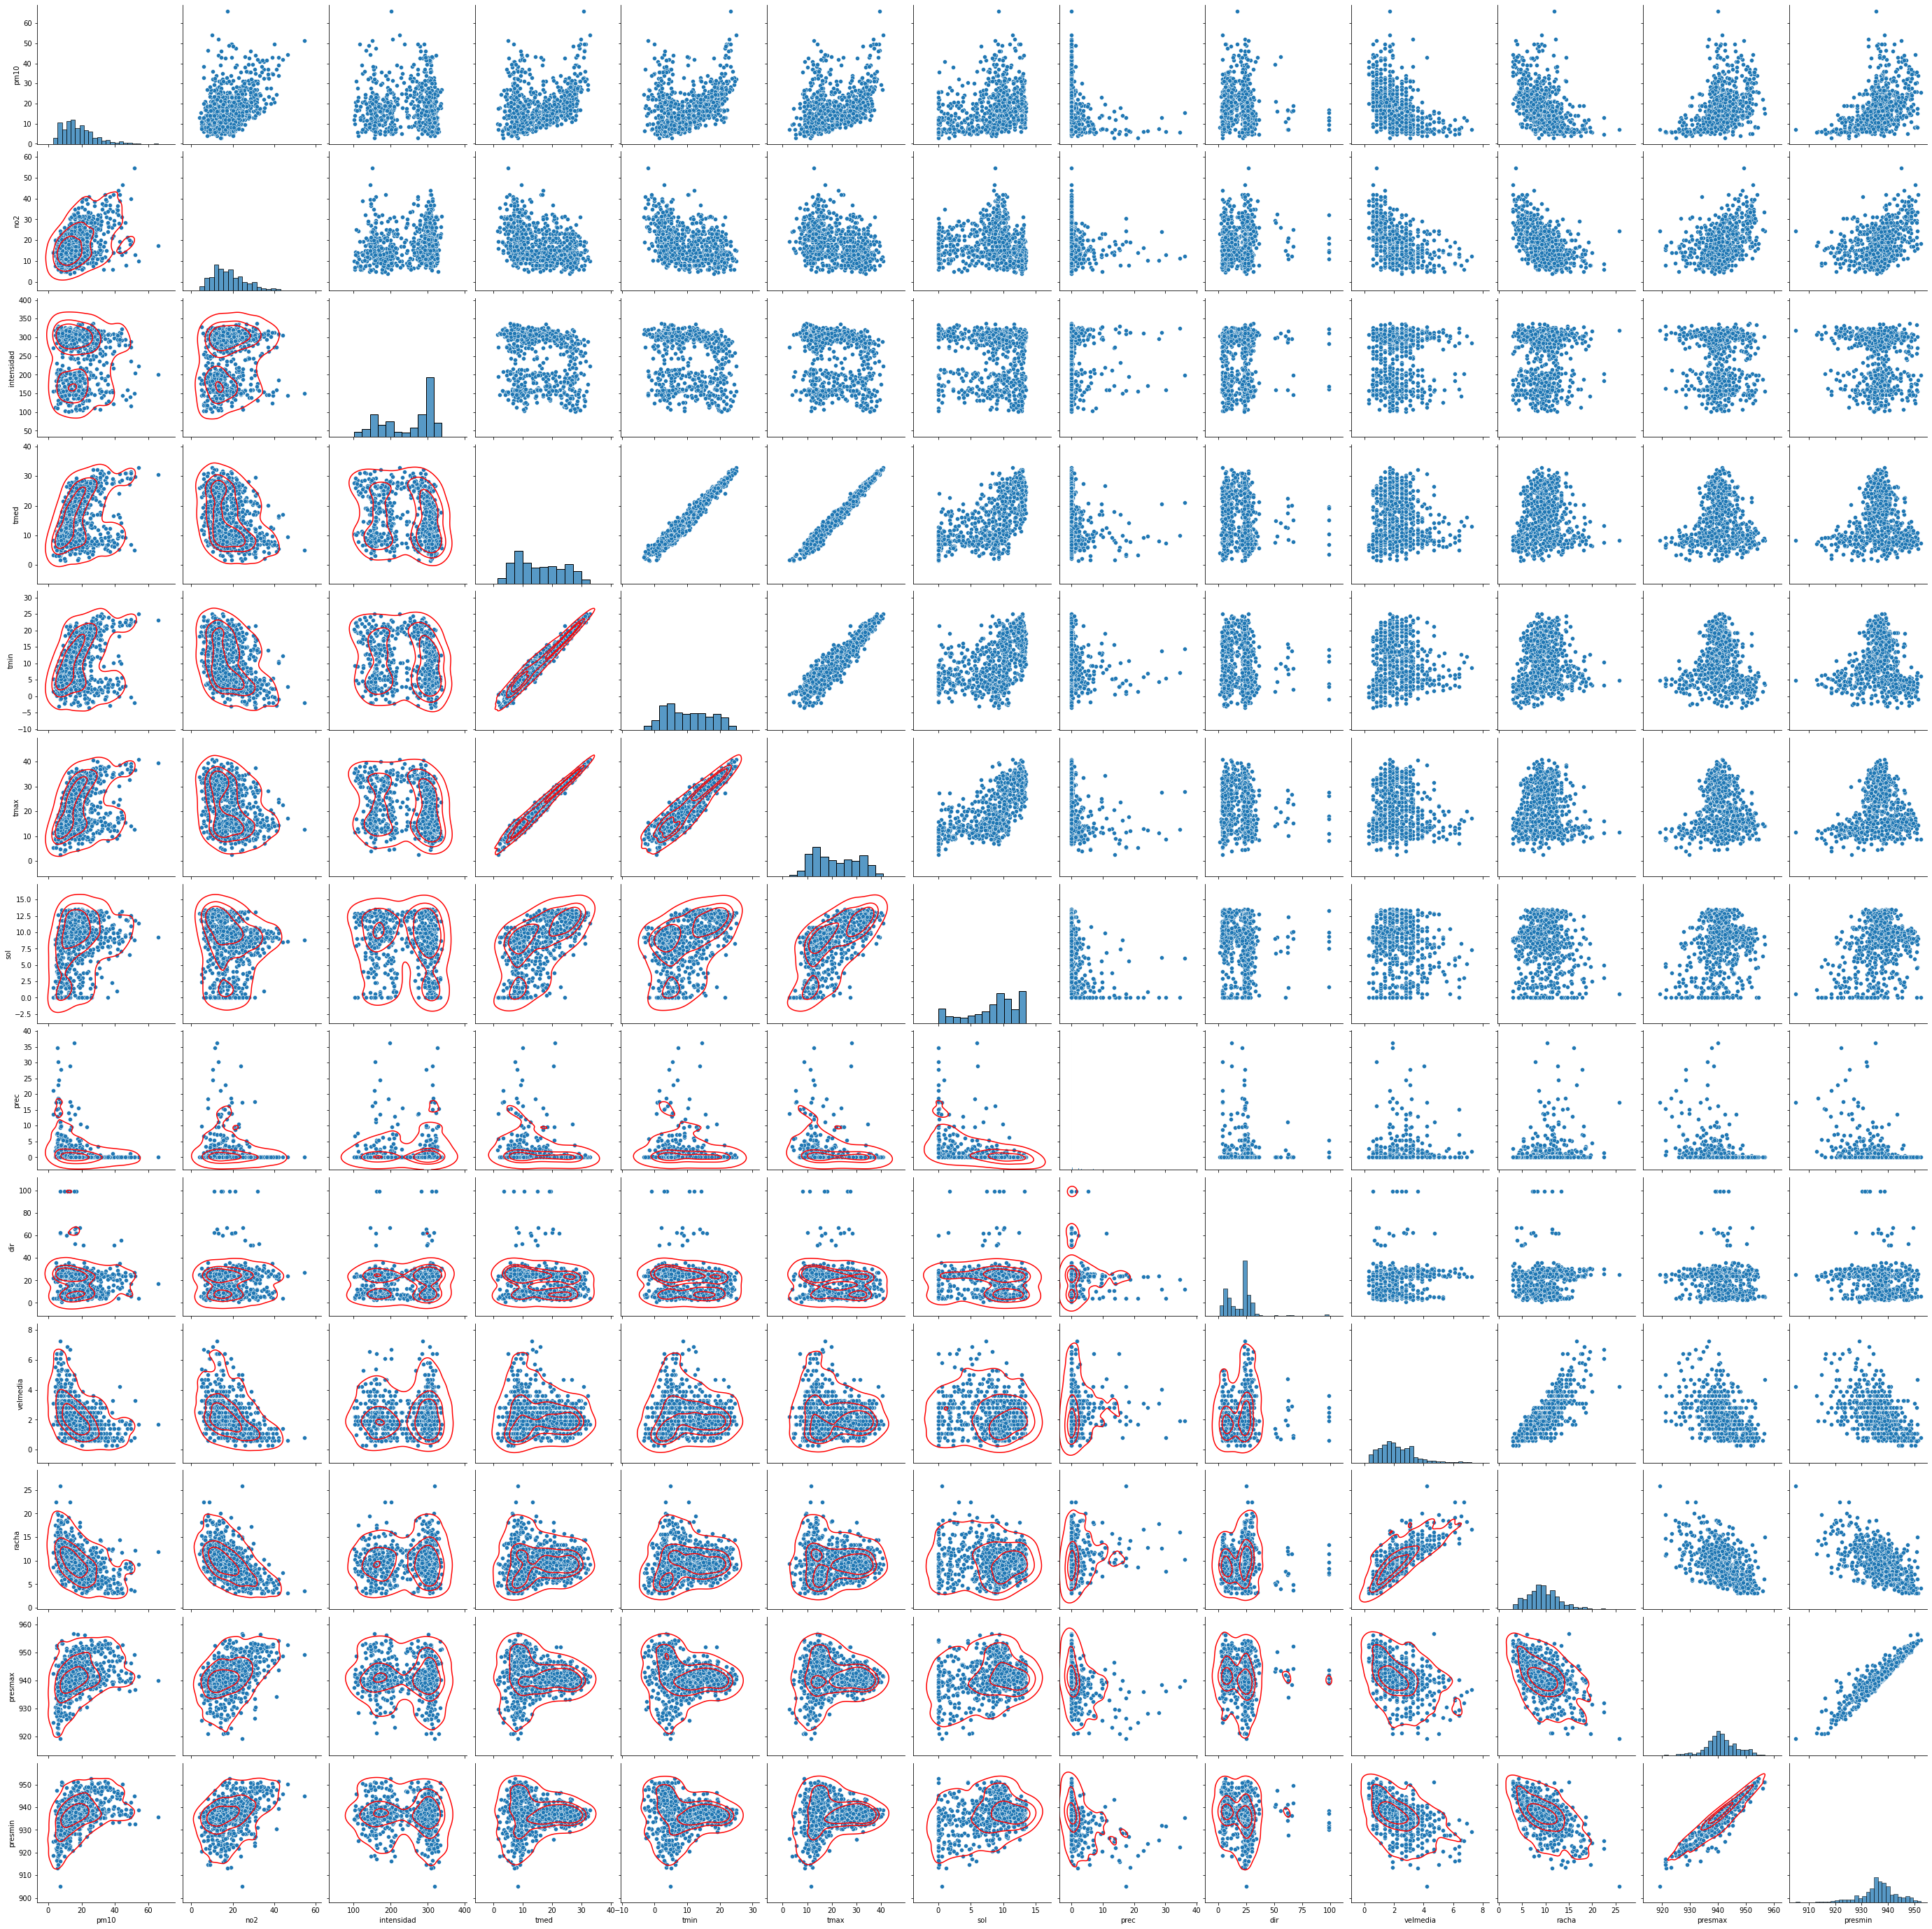

In [19]:
g = sns.pairplot(dfMergeado, diag_kind="hist",height=3,palette='Set1')
g.map_lower(sns.kdeplot, levels=4, color="red")

Nos interesa saber si hay algún tipo de relación entre los datos de calidad del aire (los 2 primeros campos pm10 y no2), los de tráfico (el último campo llamado intensidad) y los de meteorología (el resto de campos).

Lo que en este gráfico podemos ver es:

1) hay una cierta relación positiva entre PM10 y la Temperatura (media,min y max). En el caso de NO2, parece haber una relación negativa. Por tanto, a mayor temperatura hay una tendencia a tener más partículas PM10 y menos NO2 y viceversa.

2) comparando PM10 con Precipitaciones, vemos que con precipitaciones elevadas se dan pocas partículas pm10. Sólo obtenemos valores elevados de pm10 cuando hay poca precipitación. Lo cual era de esperar. 

3) igualmente pasa con NO2 y las precipitaciones, si bien algo menos acusado. 


## Hacemos visualizaremos una matriz de correlaciones en modo gráfico de heatmap

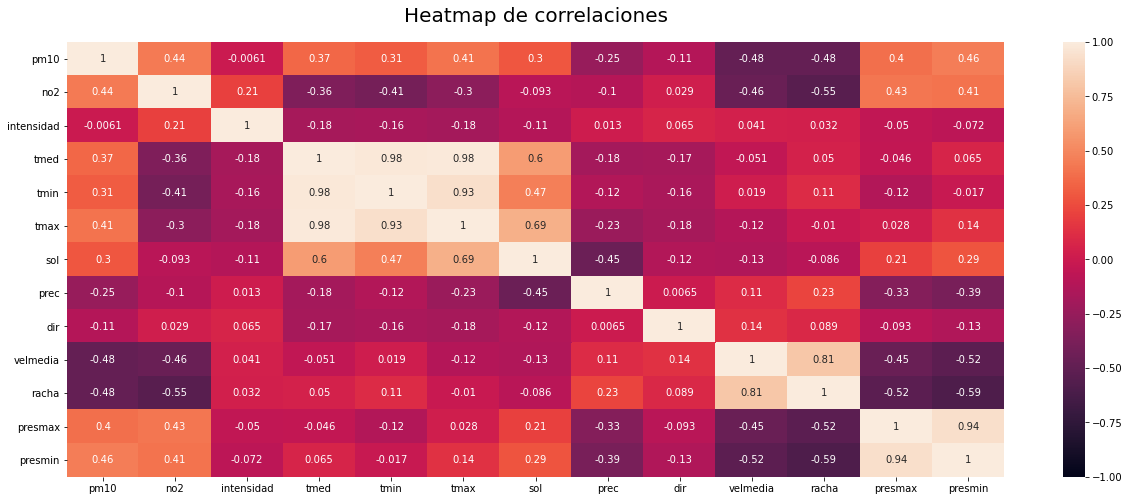

In [20]:
plt.figure(figsize=(21, 8))
heatmap = sns.heatmap(dfMergeado[['pm10','no2','intensidad','tmed','tmin','tmax','sol','prec','dir','velmedia','racha','presmax','presmin']].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap de correlaciones', fontdict={'fontsize':20}, pad=20);
plt.savefig('images output notebooks/Heatmap de correlaciones.jpg', format='jpeg', dpi=70)

De esta tabla podemos ver lo siguiente:

1) Como vimos antes, hay una pequeña correlación positiva entre PM10 y TMed, y negativa entre NO2 y Tmed. Aunque son correlaciones pequeñas son de las mayores que se dan entre variables de calidad y meteorología.

Correlaciones similares se observan, lógicamente, con las temperaturas Tmin y TMax

2) Se ven ahora también unas ciertas correlaciones entre:

- Tanto PM10 como NO2 y VelMedia y racha del viento (negativas)
- Tanto PM10 como NO2 y PresMax y PrexMin (positivas)
- PM10 y Sol (positiva) (como vimos en meteo la solarización esta relacionada positivamente con la temperatura y negativamete con la precipitación)
- NO2 y intensidad del tráfico (positiva)

3) Según esto, por tanto, parece que el tráfico influye sólo un poco en la concentración de NO2, y nada en la de PM10

#### Vamos a ver las mismas correlaciones y graficos por estación del año y tipo de dia de la semana. Para ello crearemos campos derivados de la fecha:

In [21]:
dfMergeado['season'] = (dfMergeado.index.month%12 + 3)//3

seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}

dfMergeado['season_name'] = dfMergeado['season'].map(seasons)


dfMergeado['year'] = dfMergeado.index.year
dfMergeado['month'] = dfMergeado.index.month
#dfMergeado['week'] = df_mad.index.isocalendar().week
dfMergeado['weekday'] = dfMergeado.index.weekday
dfMergeado['weekday-type'] = np.where(dfMergeado['weekday']>=5,'weekend','working day')
dfMergeado['weekday-type-bool'] = np.where(dfMergeado['weekday']>=5,'1','0').astype(int)
#transformo month y year a string para sacar el month-year
dfMergeado['month']= dfMergeado['month'].astype(str)
dfMergeado['year']= dfMergeado['year'].astype(str)
dfMergeado['month-year'] = dfMergeado[['month', 'year']].agg('-'.join, axis=1)
#sacamos un tail de 7 filas para ver que el weekday type salio bien
dfMergeado.tail(7)

pm10   no2  intensidad  tmed  tmin  tmax  sol  prec   dir  \
fecha                                                                   
2019-12-24  15.0  21.5      145.75  10.0   4.3  14.8  7.1   0.0   6.5   
2019-12-25  19.0  25.0      106.00  10.3   4.8  16.8  8.0   0.0   7.0   
2019-12-26  13.5  28.0      244.50  10.3   5.0  15.8  7.9   0.0   2.5   
2019-12-27  24.0  33.5      252.00   8.9   2.5  15.6  8.4   0.0   5.0   
2019-12-28  18.5  31.5      168.00   8.2   2.0  16.5  9.0   0.0  21.0   
2019-12-29  16.5  17.0      145.25   7.8   2.0  15.2  9.0   0.0  67.0   
2019-12-31  35.5  28.5      174.00   6.8   1.5  13.1  8.7   0.0  21.0   

            velmedia  ...  presmax  presmin  season  season_name  year month  \
fecha                 ...                                                      
2019-12-24      1.25  ...   951.20   948.25       1       Winter  2019    12   
2019-12-25      1.00  ...   948.75   945.80       1       Winter  2019    12   
2019-12-26      1.40  ...   950.40   946.85       1       Winter  2019    12   
2019-12-27      0.80  ...   951.45   949.00       1       Winter  2019    12   
2019-12-28      0.60  ...   950.75   948.80       1       Winter  2019    12   
2019-12-29      0.80  ...   952.25   949.50       1       Winter  2019    12   
2019-12-31      0.55  ...   953.10   950.75       1       Winter  2019    12   

           weekday  weekday-type weekday-type-bool  month-year  
fecha                                                           
2019-12-24       1   working day                 0     12-2019  
2019-12-25       2   working day                 0     12-2019  
2019-12-26       3   working day                 0     12-2019  
2019-12-27       4   working day                 0     12-2019  
2019-12-28       5       weekend                 1     12-2019  
2019-12-29       6       weekend                 1     12-2019  
2019-12-31       1   working day                 0     12-2019  

[7 rows x 21 columns]

In [22]:
# Ahora que tenemos las estaciones del año vamos a ver las correlaciones y otros datos por estaciones del año.
# Creamos subframes por nombre de estacion
Winter=['Winter']
Spring=['Spring']
Summer=['Summer']
Autumn=['Autumn']
df_mad_subframe=dfMergeado[['pm10','no2','intensidad','tmed','tmin','tmax','sol','prec','dir','velmedia','racha','presmax','presmin','season_name']]
df_mad_Winter = df_mad_subframe[df_mad_subframe['season_name'].isin(Winter)]
df_mad_Spring = df_mad_subframe[df_mad_subframe['season_name'].isin(Spring)]
df_mad_Summer = df_mad_subframe[df_mad_subframe['season_name'].isin(Summer)]
df_mad_Autumn = df_mad_subframe[df_mad_subframe['season_name'].isin(Autumn)]

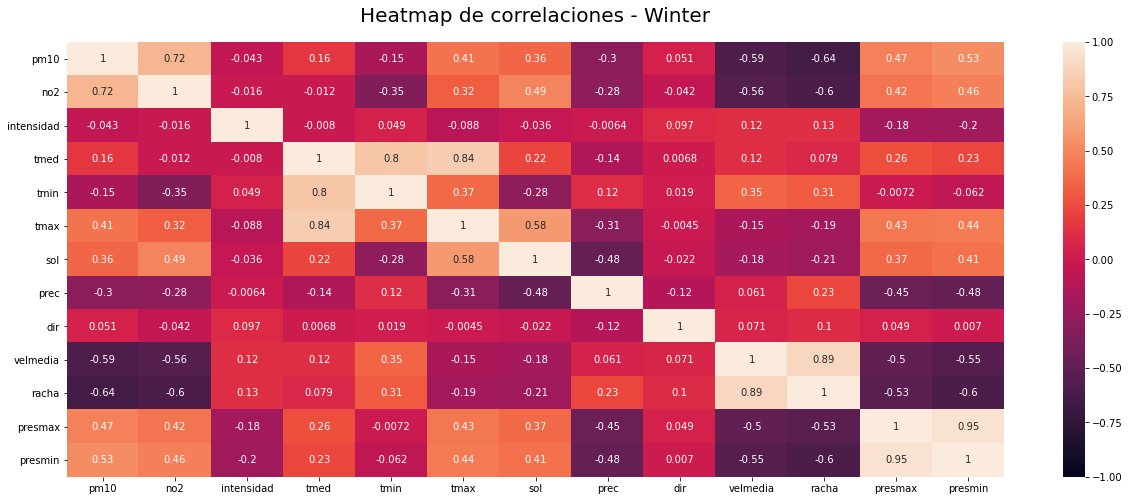

In [23]:
plt.figure(figsize=(21, 8))
heatmap = sns.heatmap(df_mad_Winter.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap de correlaciones - Winter', fontdict={'fontsize':20}, pad=20);
plt.savefig('images output notebooks/Heatmap de correlaciones winter.jpg', format='jpeg', dpi=70)

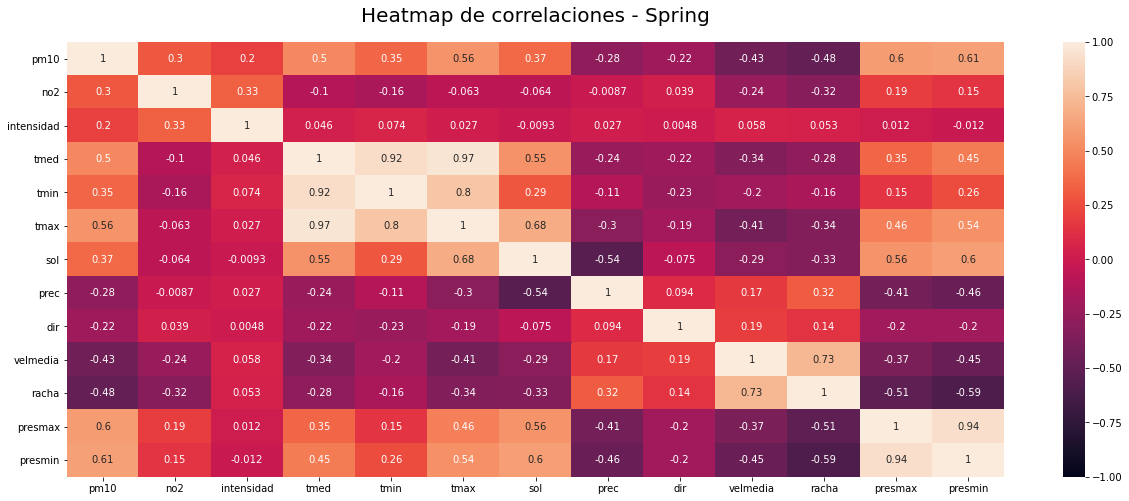

In [24]:
plt.figure(figsize=(21, 8))
heatmap = sns.heatmap(df_mad_Spring.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap de correlaciones - Spring', fontdict={'fontsize':20}, pad=20);
plt.savefig('images output notebooks/Heatmap de correlaciones spring.jpg', format='jpeg', dpi=70)

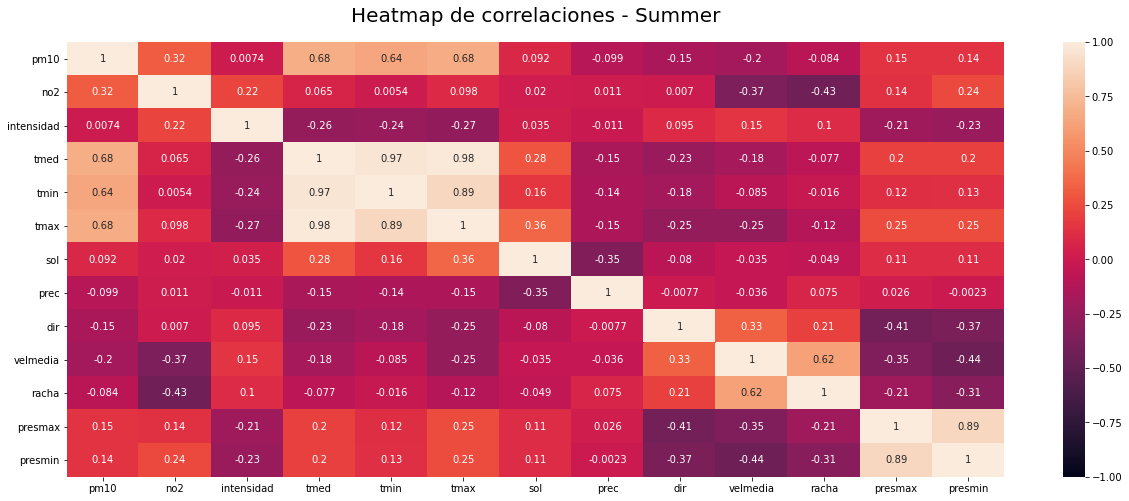

In [25]:
plt.figure(figsize=(21, 8))
heatmap = sns.heatmap(df_mad_Summer.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap de correlaciones - Summer', fontdict={'fontsize':20}, pad=20);
plt.savefig('images output notebooks/Heatmap de correlaciones summer.jpg', format='jpeg', dpi=70)

In [26]:
plt.figure(figsize=(21, 8))
heatmap = sns.heatmap(df_mad_Autumn.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap de correlaciones - Autumn', fontdict={'fontsize':20}, pad=20);
plt.savefig('images output notebooks/Heatmap de correlaciones autumn.jpg', format='jpeg', dpi=70)

## Ahora visualizaremos pm10 y no2 emparejados con las características climáticas y las estaciones del año en gráficos de parejas.
#### para simplificar las visualizaciones dejaremos tmed, prec, velmedia, presmin 

In [27]:
sns.set_style("darkgrid")
df_mad_subframe=dfMergeado[['pm10','no2','tmed','prec','velmedia','presmin','season_name','month']]
sns.pairplot(df_mad_subframe,hue='season_name',palette='Set1',height=3)

## Resumiendo los principales valores de las correlaciones por estación del año y lo analizado en los gráficos podemos ver:
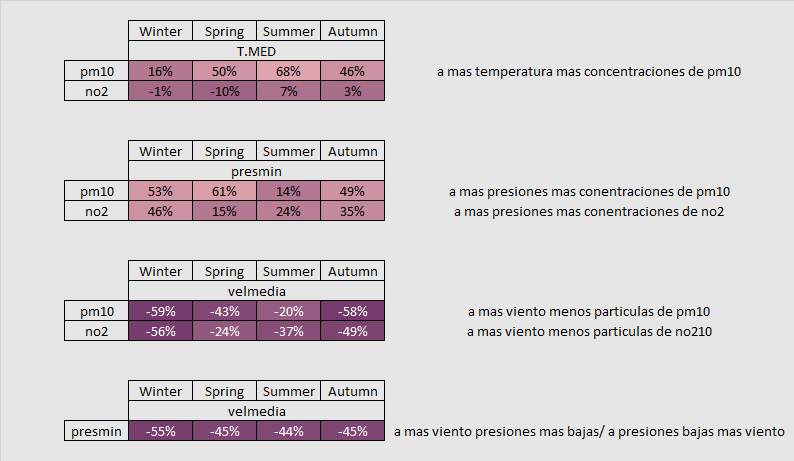
### Hay que decir que 2 años son pocas ocurrencias para sacar una conclusión por estaicón del año pero nos ayuda a entender un poco cuando se concentran los episodios de contaminacion y porque.
### Respecto a los gráficos de parejas de caracteristicas es relevante ver como el PM10 llega a sus valores mas altos en los meses de verano mientras que el no2 es en el invierno

### Para visualizar un poco mejor la relación de la presión , viento y temperatura frente los contaminantes sacaremos graficas combo por mes del año. 
### Añadiremos tambien la precipitación para tratar de entender mejor su posible influencia. 

### Empezamos con medias por mes para el Pm10:

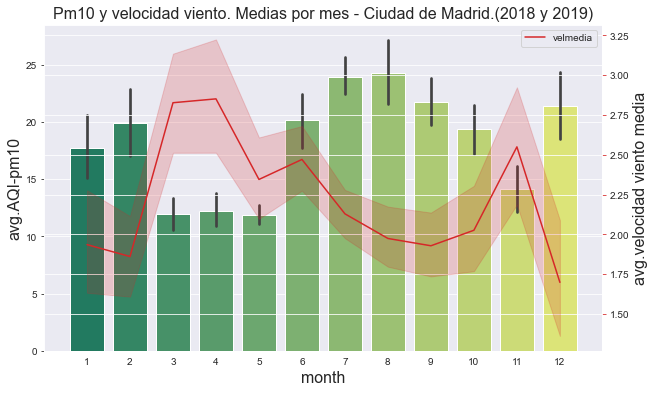

<Figure size 432x288 with 0 Axes>

In [28]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
titulo='Pm10 y velocidad viento. Medias por mes - Ciudad de Madrid.(2018 y 2019)'
ax1.set_title(titulo, fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1 = sns.barplot(x='month', y='pm10', data = df_mad_subframe, palette='summer')
ax1.set_ylabel('avg.AQI-pm10', fontsize=16)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('avg.velocidad viento media', fontsize=16)
ax2 = sns.lineplot(x='month', y='velmedia', data = df_mad_subframe, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.legend(['velmedia'])
plt.show()
plt.savefig('images output notebooks/Pm10 y velocidad viento. Medias por mes - Ciudad de Madrid.jpg', format='jpeg', dpi=70)

### En el gráfico se percibe la correlación negativa pm10 frente al viento. 
### Asi pues los meses marzo, abril , mayo y noviembre son meses con una media de viento superior a los demas meses y en estos meses concide con los niveles mas bajos de pm10.

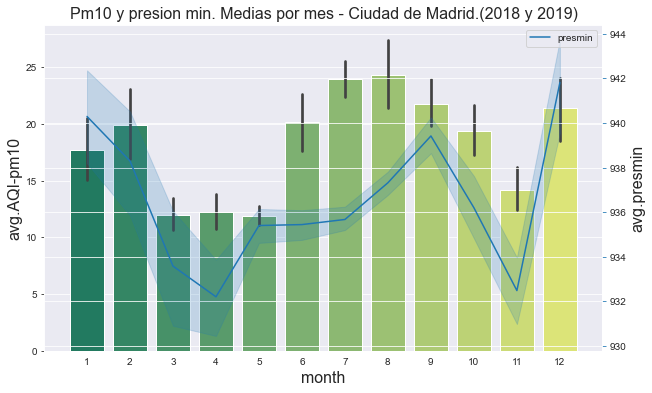

<Figure size 432x288 with 0 Axes>

In [29]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Pm10 y presion min. Medias por mes - Ciudad de Madrid.(2018 y 2019)', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1 = sns.barplot(x='month', y='pm10', data = df_mad_subframe, palette='summer')
ax1.set_ylabel('avg.AQI-pm10', fontsize=16)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
#line plot creation
ax2.set_ylabel('avg.presmin', fontsize=16)
ax2 = sns.lineplot(x='month', y='presmin', data = df_mad_subframe, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.legend(['presmin'])
plt.show()
plt.savefig('images output notebooks/pm10 y presion min. Medias por mes - Ciudad de Madrid.2018 y 2019.jpg', format='jpeg', dpi=70)

### Los meses marzo, abril , mayo y noviembre son meses con una media de presión atmosferica inferior.
### Analizando el gráfico, en el se percibe la correlación positiva pm10 frente al va la presión, sin embargo tambien vemos que en los meses de verano esta correlación. es mucho mas baja, y a pesar que las presiones no alcanzan valores elevados si lo hacen los valores de pm10 siendo su media mas alta en los meses agosto. 

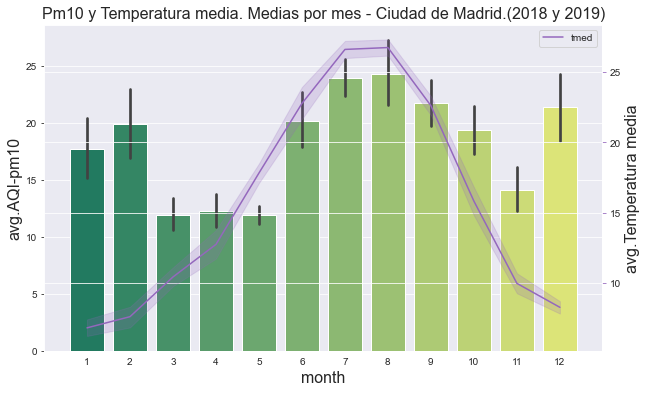

<Figure size 432x288 with 0 Axes>

In [30]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
titulo='Pm10 y Temperatura media. Medias por mes - Ciudad de Madrid.(2018 y 2019)'
ax1.set_title(titulo, fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1 = sns.barplot(x='month', y='pm10', data = df_mad_subframe, palette='summer')
ax1.set_ylabel('avg.AQI-pm10', fontsize=16)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:purple'
#line plot creation
ax2.set_ylabel('avg.Temperatura media', fontsize=16)
ax2 = sns.lineplot(x='month', y='tmed', data = df_mad_subframe, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.legend(['tmed'])
plt.show()
plt.savefig('images output notebooks/Pm10 y Temperatura media. Medias por mes - Ciudad de Madrid.jpg', format='jpeg', dpi=70)

### En el caso de la temperatura vemos como hay una correlación positiva en verano mientras que en invierno esta correlación es baja.

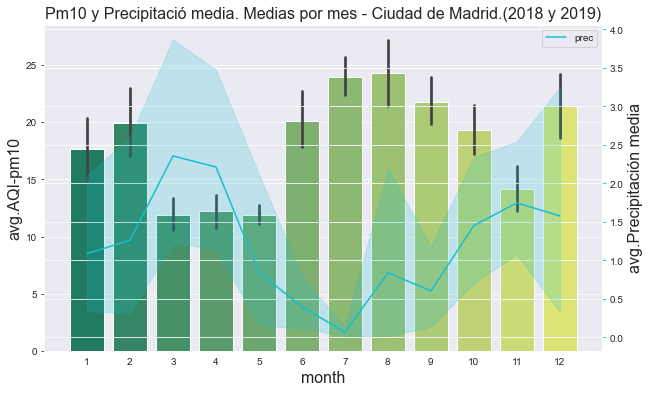

<Figure size 432x288 with 0 Axes>

In [31]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
titulo='Pm10 y Precipitació media. Medias por mes - Ciudad de Madrid.(2018 y 2019)'
ax1.set_title(titulo, fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1 = sns.barplot(x='month', y='pm10', data = df_mad_subframe, palette='summer')
ax1.set_ylabel('avg.AQI-pm10', fontsize=16)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:cyan'
#line plot creation
ax2.set_ylabel('avg.Precipitación media', fontsize=16)
ax2 = sns.lineplot(x='month', y='prec', data = df_mad_subframe, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.legend(['prec'])
plt.show()
plt.savefig('images output notebooks/Pm10 y precipitacion media. Medias por mes - Ciudad de Madrid.jpg', format='jpeg', dpi=70)

### Se intuye tambien una relacion negativa entre el pm10 y la precipitación media (La barra cyan, el area cyan indica la dispersión de la precipitación)
### Asi pues vemos que los meses marzo, abril y mayo coinciden las fechas con mas precipitaciones con la falta de pm10. 

### Ahora hacemos lo mismo con el no2:

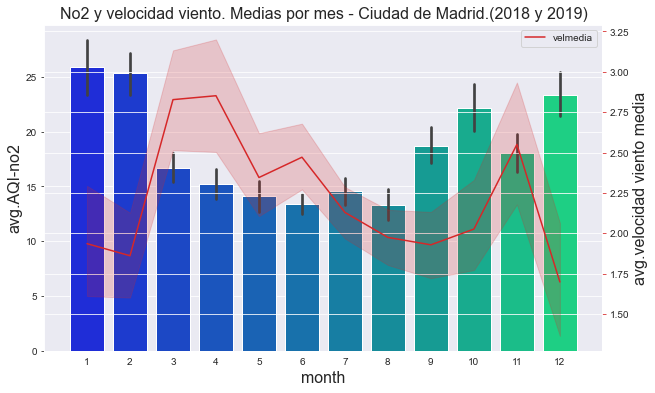

<Figure size 432x288 with 0 Axes>

In [32]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
titulo='No2 y velocidad viento. Medias por mes - Ciudad de Madrid.(2018 y 2019)'
ax1.set_title(titulo, fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1 = sns.barplot(x='month', y='no2', data = df_mad_subframe, palette='winter')
ax1.set_ylabel('avg.AQI-no2', fontsize=16)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('avg.velocidad viento media', fontsize=16)
ax2 = sns.lineplot(x='month', y='velmedia', data = df_mad_subframe, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.legend(['velmedia'])
plt.show()
plt.savefig('images output notebooks/no2 y velocidad viento. Medias por mes - Ciudad de Madrid.jpg', format='jpeg', dpi=70)

### En el gráfico se percibe la correlación negativa no2 frente al viento. 
### Al igual que con el pm10 los meses marzo, abril , mayo y noviembre son meses con una media de viento superior a los demas meses y en estos meses concide con bajadas en los niveles del contaminante.

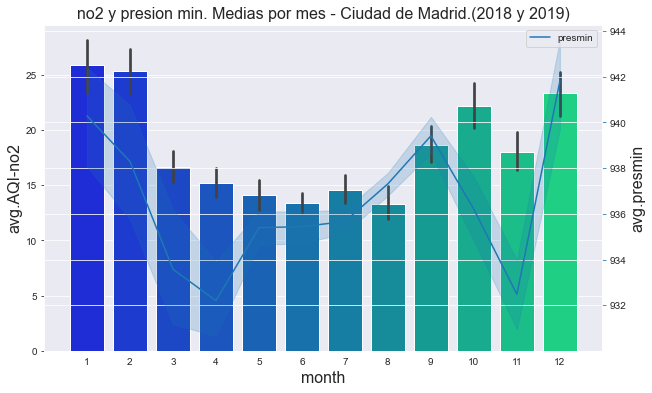

<Figure size 432x288 with 0 Axes>

In [33]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('no2 y presion min. Medias por mes - Ciudad de Madrid.(2018 y 2019)', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1 = sns.barplot(x='month', y='no2', data = df_mad_subframe, palette='winter')
ax1.set_ylabel('avg.AQI-no2', fontsize=16)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
#line plot creation
ax2.set_ylabel('avg.presmin', fontsize=16)
ax2 = sns.lineplot(x='month', y='presmin', data = df_mad_subframe, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.legend(['presmin'])
plt.show()
plt.savefig('images output notebooks/no2 y presion min. Medias por mes - Ciudad de Madrid.2018 y 2019.jpg', format='jpeg', dpi=70)

### En el gráfico se percibe mejor la diferencias de correlaciónes que vimos en el  no2 frente a las estaciones del año que vimos antes.
### Al igual que con el pm10 los meses marzo, abril y noviembre son meses con una media de presiones inferiores a otros meses r a los demas meses y en estos meses concide con bajadas en los niveles del contaminante.

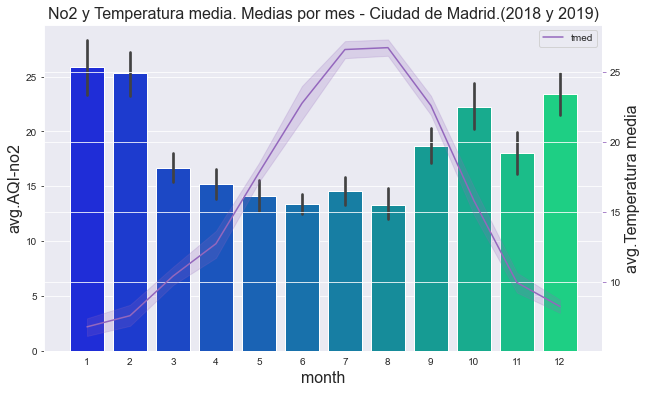

<Figure size 432x288 with 0 Axes>

In [34]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
titulo='No2 y Temperatura media. Medias por mes - Ciudad de Madrid.(2018 y 2019)'
ax1.set_title(titulo, fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1 = sns.barplot(x='month', y='no2', data = df_mad_subframe, palette='winter')
ax1.set_ylabel('avg.AQI-no2', fontsize=16)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:purple'
#line plot creation
ax2.set_ylabel('avg.Temperatura media', fontsize=16)
ax2 = sns.lineplot(x='month', y='tmed', data = df_mad_subframe, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.legend(['tmed'])
plt.show()
plt.savefig('images output notebooks/no2 y Temperatura media. Medias por mes - Ciudad de Madrid.jpg', format='jpeg', dpi=70)

### Como ya se intuia en los graficós de parejas y en las correlaciones el no2 se comporta diferente frente a la temperatura.
### En este caso conentra mas en los meses frios de inviernto que en los calurosos de verano.


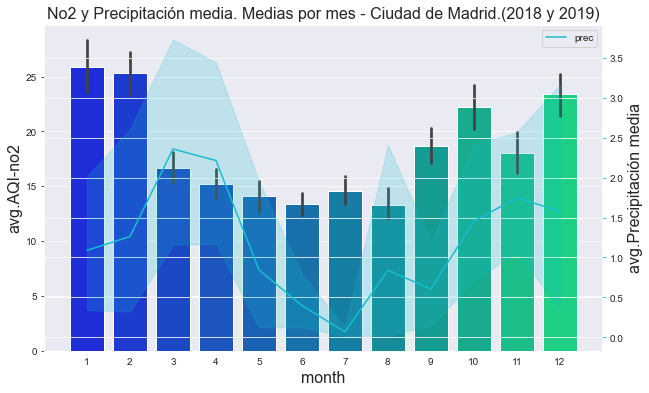

<Figure size 432x288 with 0 Axes>

In [35]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
titulo='No2 y Precipitación media. Medias por mes - Ciudad de Madrid.(2018 y 2019)'
ax1.set_title(titulo, fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1 = sns.barplot(x='month', y='no2', data = df_mad_subframe, palette='winter')
ax1.set_ylabel('avg.AQI-no2', fontsize=16)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:cyan'
#line plot creation
ax2.set_ylabel('avg.Precipitación media', fontsize=16)
ax2 = sns.lineplot(x='month', y='prec', data = df_mad_subframe, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.legend(['prec'])
plt.show()
plt.savefig('images output notebooks/no2 y precipitacion media. Medias por mes - Ciudad de Madrid.jpg', format='jpeg', dpi=70)

### La precipitación media no parecia estar correlacionada con los valores de no2. 
### El grafico de medias mensuales no parece mostrar una logica como en el caso del pm10. 

## Ahora visualizaremos pm10 y no2 emparejados con las característica de intensidad de trafico y el tipo de dia de semana. 
#### Como ya vimos en fin de semana la intensidad de trafico cae. Ahora veremos si esto se traduce en los valroes de contaminación por tipo de dia de la semana
#### Sacaremos un gráfico de parejas y gráficos de combo de Barras y lineas con las medias por dia de la semana. 

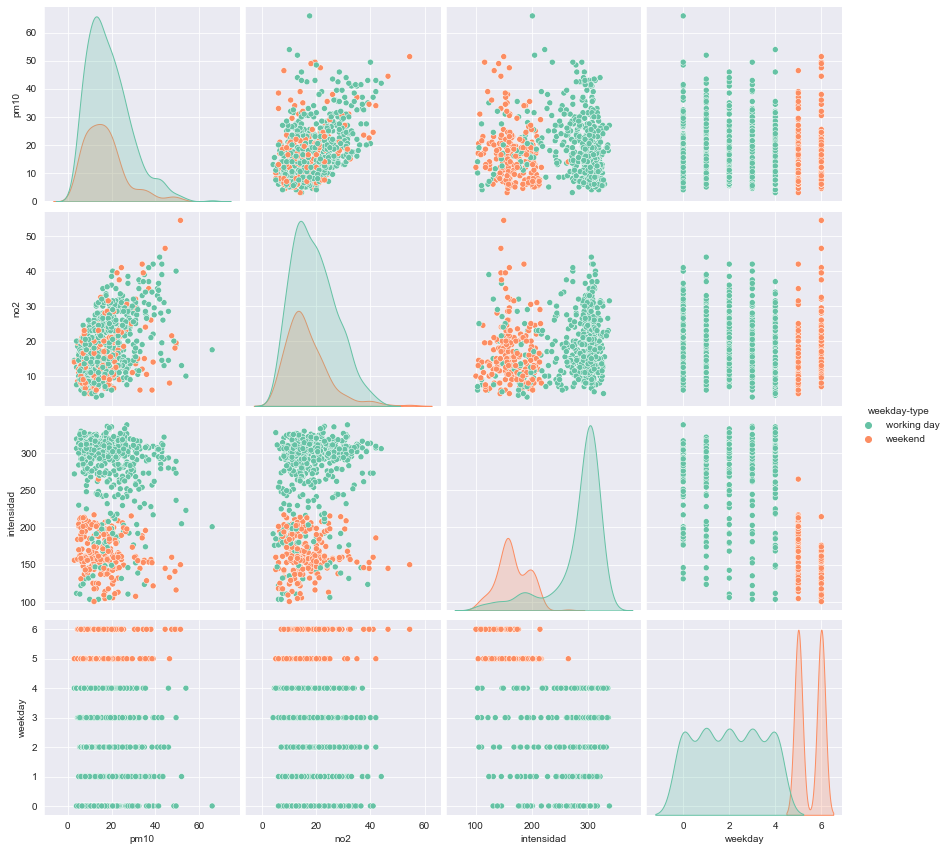

In [36]:
##visualizaremos vs tipo dia semana
sns.set_style("darkgrid")
df_mad_subframe=dfMergeado[['pm10','no2','intensidad','weekday','weekday-type']]
sns.pairplot(df_mad_subframe,hue='weekday-type',palette='Set2',height=3)

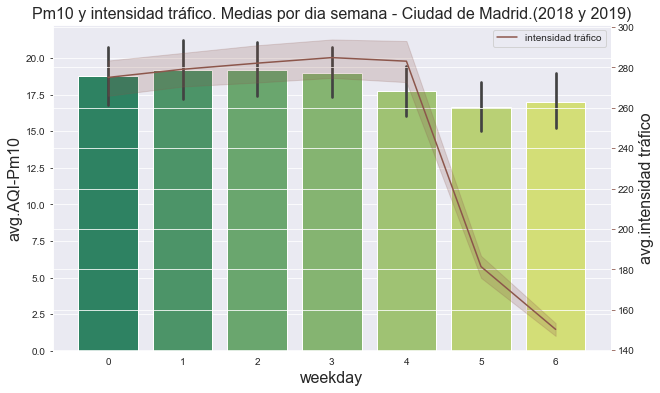

<Figure size 432x288 with 0 Axes>

In [37]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
titulo='Pm10 y intensidad tráfico. Medias por dia semana - Ciudad de Madrid.(2018 y 2019)'
ax1.set_title(titulo, fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1 = sns.barplot(x='weekday', y='pm10', data = df_mad_subframe, palette='summer')
ax1.set_ylabel('avg.AQI-Pm10', fontsize=16)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:brown'
#line plot creation
ax2.set_ylabel('avg.intensidad tráfico', fontsize=16)
ax2 = sns.lineplot(x='weekday', y='intensidad', data = df_mad_subframe, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.legend(['intensidad tráfico'])
plt.show()
plt.savefig('images output notebooks/pm10 y intensidad trafico media. Medias por mes - Ciudad de Madrid.jpg', format='jpeg', dpi=70)

### En el caso del Pm10 parece tener relacion la la bajada en intensidad de trafico respecto el AQI de pm10. 
### Vemos claramento como en los dias 5 y 6 (sabado y domingo) los valores de intensidad de trafico caen y a su vez los de pm10 son ligeramente inferiores al resto de dias de la semana. 

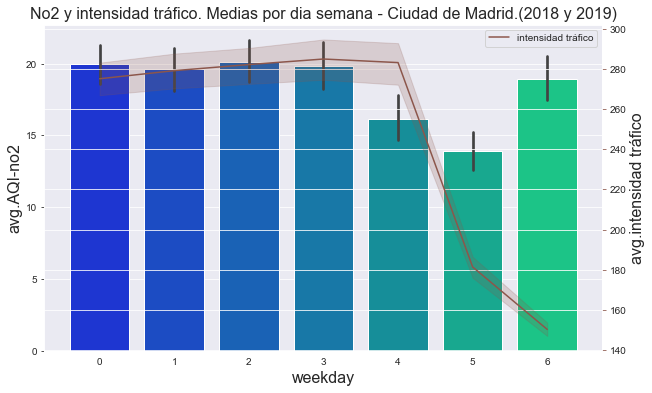

<Figure size 432x288 with 0 Axes>

In [38]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
titulo='No2 y intensidad tráfico. Medias por dia semana - Ciudad de Madrid.(2018 y 2019)'
ax1.set_title(titulo, fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1 = sns.barplot(x='weekday', y='no2', data = df_mad_subframe, palette='winter')
ax1.set_ylabel('avg.AQI-no2', fontsize=16)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:brown'
#line plot creation
ax2.set_ylabel('avg.intensidad tráfico', fontsize=16)
ax2 = sns.lineplot(x='weekday', y='intensidad', data = df_mad_subframe, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.legend(['intensidad tráfico'])
plt.show()
plt.savefig('images output notebooks/no2 y intensidad trafico media. Medias por mes - Ciudad de Madrid.jpg', format='jpeg', dpi=70)

### En el caso del No2 en cambio vemos como los valores AQI medios mas bajos se encuentran en los viernes y sabado, mientras que el domingo parece remontar a pesar de que es el dia con menos intensidad de trafico. 
### Podria tratarse de una relación descompasada 6 dias en el caso del no2 por retardo de la emision del contaminante hasta su oxidacion a no2? 
https://www.miteco.gob.es/es/calidad-y-evaluacion-ambiental/temas/atmosfera-y-calidad-del-aire/calidad-del-aire/salud/oxidos-nitrogeno.aspx

## Analizamos cada variable y sus sesgos

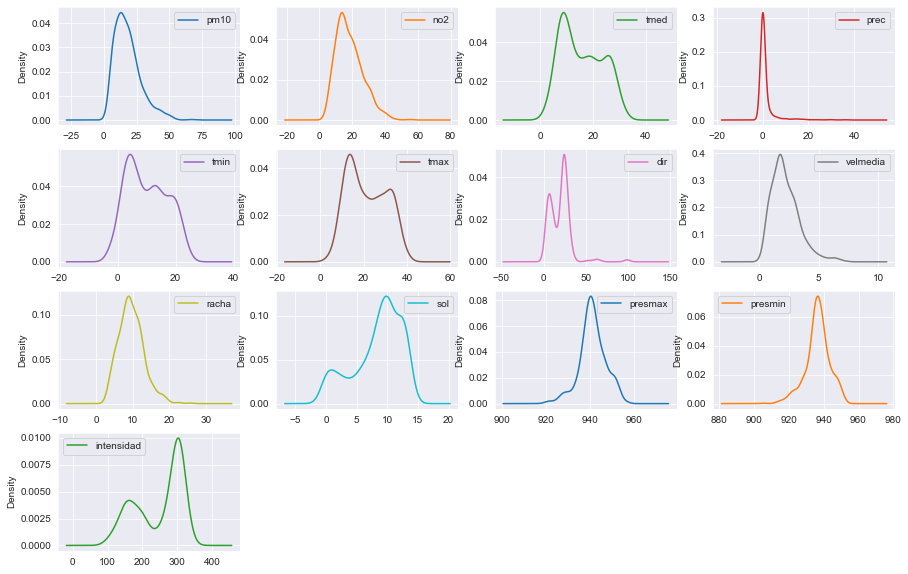

In [39]:
dfMergeado[['pm10', 'no2', 'tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia','racha', 'sol', 'presmax', 'presmin', 'intensidad']].plot(kind='density', subplots=True, layout=(4,4), figsize=(15,10), sharex=False);


In [40]:
print(dfMergeado[['pm10', 'no2', 'tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia','racha', 'sol', 'presmax', 'presmin', 'intensidad']].skew())

pm10          1.121938
no2           0.787127
tmed          0.273451
prec          5.138789
tmin          0.211913
tmax          0.209375
dir           2.328738
velmedia      1.146313
racha         0.656899
sol          -0.783267
presmax      -0.315820
presmin      -0.563330
intensidad   -0.563396
dtype: float64


Es probable que convenga normalizar las variables. Lo probaremos después en iteraciones de prueba de algoritmos.

Exportamos a un CSV el dataset mergeado sin ninguna transformación, antes de comenzar con la selección de características

In [41]:
dfMergeado.to_csv('DatosMergeadosMadrid.csv')

## 3. Selección de características

Vamos a analizar una posible selección de características de Meteorología con cuatro sistemas distintos, y después escogeremos con cuál quedarnos.

Lo haremos para PM10 y para NO2, comparando los resultados para ambos.

De tráfico sólo disponemos de una variable que mide la intensidad del trafico, por lo que no aplica ninguna reducción.

In [42]:
nombres = ['tmed','prec','dir','velmedia','racha','sol','presmax','presmin']
dfMergeado[['pm10','no2','tmed','prec','dir','velmedia','racha','sol','presmax','presmin']].head()

pm10   no2  tmed  prec   dir  velmedia  racha  sol  presmax  \
fecha                                                                     
2018-01-01   8.0  15.0   6.9   0.0  26.0       3.1   10.0  5.9   953.25   
2018-01-02   8.5  18.0  10.4   0.0  29.0       2.8   11.9  7.0   953.25   
2018-01-03   8.0  16.0  10.9   0.0  23.0       1.7    8.6  4.6   954.15   
2018-01-04   5.0  16.5  11.3   0.0  25.0       2.2    7.8  5.8   951.55   
2018-01-05   3.0  14.5   8.2  13.6  22.0       3.1   11.7  1.6   942.35   

            presmin  
fecha                
2018-01-01   950.00  
2018-01-02   950.90  
2018-01-03   951.05  
2018-01-04   942.35  
2018-01-05   925.00

In [43]:
## Para Selección univariante
from sklearn.feature_selection import SelectKBest, f_regression

## Para PCA (Análisis de Componentes Principales)
from sklearn.decomposition import PCA

## Para RFE (Eliminación de Características Recursiva)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression #(aunque ya la habíamos importado al principio, para mayor claridad)

## Para importancia de la característica
from sklearn.ensemble import ExtraTreesRegressor


array = dfMergeado[['pm10','no2','tmed','prec','dir','velmedia','racha','sol','presmax','presmin']].values
X = array[:,2:]
Ypm10 = array[:,0]
Yno2 = array[:,1]

### 1.1 Selección univariante - para PM10

In [44]:
# 1.Extracción de 4 características con pruebas estadísticas univariadas 

Y = Ypm10

##  (f_regression para regresión)
test = SelectKBest(score_func=f_regression, k=4)
fit = test.fit(X, Y)

# resumir puntuaciones de ['tmed','prec','dir','velmedia','racha','sol','presmax','presmin']
set_printoptions(precision=3)
print('Puntuaciones de las características')
print(nombres)
print(fit.scores_)
features = fit.transform(X)

# resumen de las 4 características seleccionadas
# [ 'velmedia' , 'racha' , 'presmax', 'presmin' ]
print('\nResumen de valores de las 4 características elegidas')
print(features[0:5,:])

Puntuaciones de las características
['tmed', 'prec', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin']
[112.791  48.236   8.869 216.652 216.657  69.38  136.488 191.112]

Resumen de valores de las 4 características elegidas
[[  3.1   10.   953.25 950.  ]
 [  2.8   11.9  953.25 950.9 ]
 [  1.7    8.6  954.15 951.05]
 [  2.2    7.8  951.55 942.35]
 [  3.1   11.7  942.35 925.  ]]


      campo      puntos
4     racha  216.657384
3  velmedia  216.651507
7   presmin  191.111726
6   presmax  136.487565
0      tmed  112.791410
5       sol   69.380034
1      prec   48.235971
2       dir    8.868976


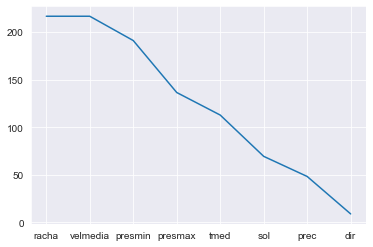

In [45]:
puntuaciones = {'campo':nombres, 'puntos':fit.scores_}
dfpuntuaciones = pd.DataFrame(puntuaciones)
dfpuntuaciones = dfpuntuaciones.sort_values(by='puntos', ascending=False)
print(dfpuntuaciones)
grafica = plt.plot(dfpuntuaciones.campo, dfpuntuaciones.puntos)
plt.show;

Las características elegidas son:  ['racha' , 'velmedia' , 'presmin', 'presmax' ]

### 1.2 Selección univariante - para NO2

In [46]:
# 1.Extracción de 4 características con pruebas estadísticas univariadas 

Y = Yno2

##  (f_regression para regresión)
test = SelectKBest(score_func=f_regression, k=4)
fit = test.fit(X, Y)

# resumir puntuaciones de ['tmed','prec','dir','velmedia','racha','sol','presmax','presmin']
set_printoptions(precision=3)
print('Puntuaciones de las características')
print(nombres)
print(fit.scores_)
features = fit.transform(X)

# resumen de las características seleccionadas
# ['velmedia' , 'racha' , 'presmax', 'presmin' ]
print('\nResumen de valores de las 4 características elegidas')
print(features[0:5,:])

Puntuaciones de las características
['tmed', 'prec', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin']
[107.468   8.087   0.614 190.585 309.064   6.334 163.13  146.208]

Resumen de valores de las 4 características elegidas
[[  3.1   10.   953.25 950.  ]
 [  2.8   11.9  953.25 950.9 ]
 [  1.7    8.6  954.15 951.05]
 [  2.2    7.8  951.55 942.35]
 [  3.1   11.7  942.35 925.  ]]


      campo      puntos
4     racha  309.064001
3  velmedia  190.585020
6   presmax  163.130329
7   presmin  146.208292
0      tmed  107.467534
1      prec    8.087396
5       sol    6.333539
2       dir    0.614284


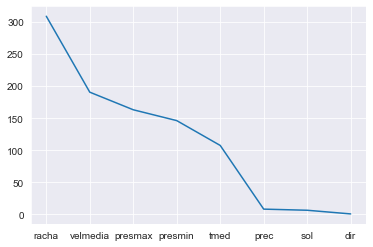

In [47]:
puntuaciones = {'campo':nombres, 'puntos':fit.scores_}
dfpuntuaciones = pd.DataFrame(puntuaciones)
dfpuntuaciones = dfpuntuaciones.sort_values(by='puntos', ascending=False)
print(dfpuntuaciones)
grafica = plt.plot(dfpuntuaciones.campo, dfpuntuaciones.puntos)
plt.show;

Las características elegidas son: ['racha' , 'velmedia' , 'presmax', 'presmin' ] , las mismas que para el PM10

### 2.1 RFE (Recursive Feature Elimination - Eliminación Recursiva de Características) - PM10

Usaremos RFE con el algoritmo de regresión lineal para seleccionar las 4 características principales. 

In [48]:
# 2.Extracción de características con RFE
## modelo = SVR

Y=Ypm10

modelo = SVR(kernel="linear")
rfe = RFE(modelo, n_features_to_select=4)

fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print(nombres)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 4
['tmed', 'prec', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin']
Selected Features: [ True False False  True  True False  True False]
Feature Ranking: [1 3 5 1 1 4 1 2]


      campo  punts
0      tmed      1
3  velmedia      1
4     racha      1
6   presmax      1
7   presmin      2
1      prec      3
5       sol      4
2       dir      5


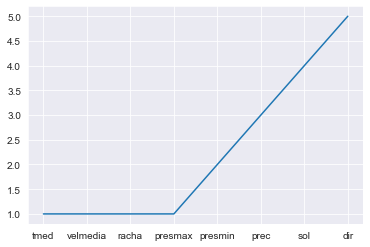

In [49]:
puntuaciones = {'campo':nombres, 'punts':fit.ranking_}
dfpuntuaciones = pd.DataFrame(puntuaciones)
dfpuntuaciones = dfpuntuaciones.sort_values(by='punts', ascending=True)
print(dfpuntuaciones)
grafica = plt.plot(dfpuntuaciones.campo, dfpuntuaciones.punts)
plt.show;

Las características elegidas son: [ 'tmed' , 'velmedia' , 'racha' ,  'presmax' ]

### 2.2 RFE (Recursive Feature Elimination - Eliminación Recursiva de Características) - NO2

In [50]:
# 2.Extracción de características con RFE
## modelo = SVR

Y=Yno2

modelo = SVR(kernel="linear")
rfe = RFE(modelo, n_features_to_select=4)

fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print(nombres)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 4
['tmed', 'prec', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin']
Selected Features: [ True False False  True  True False  True False]
Feature Ranking: [1 2 4 1 1 3 1 5]


      campo  punts
0      tmed      1
3  velmedia      1
4     racha      1
6   presmax      1
1      prec      2
5       sol      3
2       dir      4
7   presmin      5


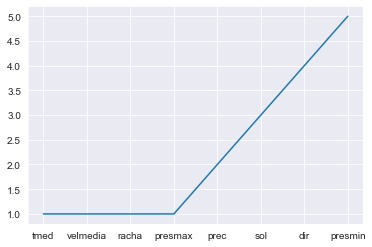

In [51]:
puntuaciones = {'campo':nombres, 'punts':fit.ranking_}
dfpuntuaciones = pd.DataFrame(puntuaciones)
dfpuntuaciones = dfpuntuaciones.sort_values(by='punts', ascending=True)
print(dfpuntuaciones)
grafica = plt.plot(dfpuntuaciones.campo, dfpuntuaciones.punts)
plt.show;

Las características elegidas son: [ 'tmed' , 'velmedia' , 'racha' , 'presmax' ] , las mismas que para el PM10

### 3 PCA (*Principal Component Analysis* – Análisis de Componente Principal)

El PCA no usa un modelo de algoritmo, es independiente del segmento Y, por lo que su implementación es ya válida tanto para el PM10 como para el NO2

El PCA no selecciona características sino que comprime todas las caractarísticas del segmento X en el número que le digamos (en este caso 4) de nuevas características calculadas.

In [52]:
# 3.Extracción de características con PCA
pca = PCA(n_components=4)
Xtransformed = pca.fit_transform(X)

# Vista resumen de los nuevos componentes
print(Xtransformed)

[[  4.942 -17.443 -10.005   1.432]
 [  7.126 -18.55   -5.9     2.039]
 [  1.132 -18.529  -7.497   3.314]
 ...
 [ -0.216 -16.032  -8.667   0.372]
 [ 44.091 -26.326  -1.834   2.116]
 [ -0.497 -18.947 -10.524   0.806]]


In [53]:
dfsinMeteo = dfMergeado[['pm10', 'no2','intensidad']]
dfPCA = pd.DataFrame(Xtransformed, columns=['PCA1','PCA2','PCA3','PCA4'], index=dfMergeado.index)
dfMergeadoPCA = pd.merge(dfsinMeteo,dfPCA, left_index=True, right_index=True)
print(dfMergeadoPCA)

            pm10   no2  intensidad       PCA1       PCA2       PCA3      PCA4
fecha                                                                        
2018-01-01   8.0  15.0      131.00   4.941633 -17.443370 -10.004506  1.432410
2018-01-02   8.5  18.0      256.50   7.125600 -18.549617  -5.899523  2.038963
2018-01-03   8.0  16.0      272.50   1.132189 -18.528549  -7.496771  3.314384
2018-01-04   5.0  16.5      284.00   4.336407 -11.549846  -5.651236  1.478165
2018-01-05   3.0  14.5      272.00   6.058429  10.994851  -9.349726  9.838573
...          ...   ...         ...        ...        ...        ...       ...
2019-12-26  13.5  28.0      244.50 -17.992276 -10.358734  -9.791212  0.253820
2019-12-27  24.0  33.5      252.00 -15.777992 -13.028722 -10.778884  0.258528
2019-12-28  18.5  31.5      168.00  -0.215763 -16.031927  -8.666649  0.372109
2019-12-29  16.5  17.0      145.25  44.090564 -26.326370  -1.833578  2.115630
2019-12-31  35.5  28.5      174.00  -0.497463 -18.946554 -10.523

### 4.1 Importancia de Características - PM10

Usamos el modelo de ExtraTreesRegressor para identificar la importancia de las diferentes características

In [54]:
# 4.Extracción de importancia de las características

Y = Ypm10

model = ExtraTreesRegressor()
model.fit(X, Y)
print(nombres)
print(model.feature_importances_)

['tmed', 'prec', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin']
[0.319 0.023 0.051 0.152 0.183 0.083 0.079 0.11 ]


      campo    puntos
0      tmed  0.319150
4     racha  0.182559
3  velmedia  0.151524
7   presmin  0.109956
5       sol  0.083169
6   presmax  0.079294
2       dir  0.051213
1      prec  0.023134


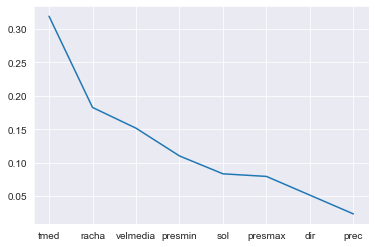

In [55]:
puntuaciones = {'campo':nombres, 'puntos':model.feature_importances_}
dfpuntuaciones = pd.DataFrame(puntuaciones)
dfpuntuaciones = dfpuntuaciones.sort_values(by='puntos', ascending=False)
print(dfpuntuaciones)
grafica = plt.plot(dfpuntuaciones.campo, dfpuntuaciones.puntos)
plt.show;

Seleccionando las 4 características con mayor puntuación, las características elegidas son: [ 'tmed' , racha', 'presmin' ,'velmedia'] 

Identico a lo seleccionado por el sistema de Selección Univariante

### 4.2 Importancia de Características - NO2

In [56]:
# 4.Extracción de importancia de las características

Y = Yno2

model = ExtraTreesRegressor()
model.fit(X, Y)
print(nombres)
print(model.feature_importances_)

['tmed', 'prec', 'dir', 'velmedia', 'racha', 'sol', 'presmax', 'presmin']
[0.126 0.03  0.066 0.148 0.252 0.119 0.123 0.136]


      campo     punts
4     racha  0.252164
3  velmedia  0.147582
7   presmin  0.135833
0      tmed  0.126358
6   presmax  0.123309
5       sol  0.118989
2       dir  0.065911
1      prec  0.029856


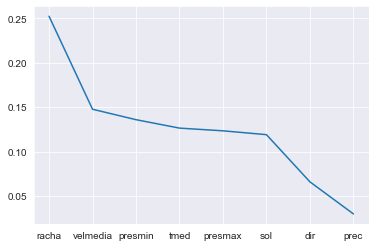

In [57]:
puntuaciones = {'campo':nombres, 'punts':model.feature_importances_}
dfpuntuaciones = pd.DataFrame(puntuaciones)
dfpuntuaciones = dfpuntuaciones.sort_values(by='punts', ascending=False)
print(dfpuntuaciones)
grafica = plt.plot(dfpuntuaciones.campo, dfpuntuaciones.punts)
plt.show;

Seleccionando las 4 características con mayor puntuación, las características elegidas son: ['racha' , 'velmedia' , 'presmax' ,'tmed'] 

La tmed obtiene un valor de 0,12 y la presmin de 0,121, ambos valores prácticamente iguales. Hemos preferido seleccionar la tmed al tener ya incluida la presmax, y para asemejar el resultado con el del PM10

**Resumiendo:**

- 1.1 Selección univariante PM10 -  ['racha' , 'velmedia' , 'presmin', 'presmax' ]
- 1.2 Selección univariante NO2 -  ['racha' , 'velmedia' , 'presmax', 'presmin' ]
- 2.1 RFE PM10 - [ 'tmed' , 'velmedia' , 'racha' , 'presmax' ]
- 2.2 RFE NO2 - [ 'tmed' , 'velmedia' , 'racha' , 'presmax' ]
- 4.1 Importancia de Características PM10 - [ 'tmed' , racha', 'presmin' ,'velmedia'] 
- 4.2 Importancia de Características NO2 - ['racha' , 'velmedia' , 'presmax' ,'tmed'] 
 

CONCLUSIÓN: 

- Para la predicción de **PM10** escogeríamos **[ 'tmed' , 'velmedia' , 'racha' , 'presmax' ]** por ser la combinación más puntuada
- Para la predicción de **NO2** escogeríamos **[ 'tmed' , 'velmedia' , 'racha' , 'presmax' ]** por la misma razón, observando que es la misma combinación que para PM10

En caso de usar el sistema PCA, las 4 características serían las calculadas bajo el nombre de Xtransformed. Pero en principio no usaremos este sistema.

Vamos a exportar a un CSV el dataset mergeado con la reducción de características escogido (el mismo válido para ambos contaminantes):

In [58]:
dfMergeadoSelCarac = dfMergeado[['pm10', 'no2', 'tmed', 'velmedia','racha', 'presmax', 'intensidad']]

dfMergeadoSelCarac.to_csv('DatosMergeadosMadrid_ConSeleccionCaract.csv')
dfMergeadoPCA.to_csv('DatosMergeadosMadrid_ConSeleccionCaract_PCA.csv')